<a href="https://colab.research.google.com/github/hautran2705/ML/blob/main/ML_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tickerName='https://raw.githubusercontent.com/hautran2705/ML/main/AAPL'
typeTrain='day'
numberOfInput=1
sNumberOfInput='1'
lenFile=373
numberOftrain=300
#300 day, 2350 hour
#price of change 373,2610

In [3]:
df = pd.read_csv(tickerName+".csv")
print("Number of rows and columns:", df.shape)

Number of rows and columns: (374, 7)


In [4]:
#@title getClose
df['Date'] = df.index
data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data['Date'] = df['Date']
data['Open'] = df['Open']
data['High'] = df['High']
data['Low'] = df['Low']
data['Close'] = df['Close']

training_set = data.iloc[:, 1:2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(numberOfInput, numberOftrain): # upper bound is number of values 
  X_train.append(training_set_scaled[i-numberOfInput:i, 0]) #takes 60 previous stock prices from 60 past stock prices
  y_train.append(training_set_scaled[i, 0]) #contains stock price learned to predict 
X_train, y_train = np.array(X_train), np.array(y_train) # make into numpy arrays 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# total of 4 layers, simply need to copy, only change is input shape so dont need to specify that, automatically recognised through input shape

regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
# same as second layer 
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# almost same, but return sequence is false because it is the last lstm layer (so it is removed becasue default is false)
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
#add fully connected layer through dense class- dimesion/units/neurons is 1
regressor.add(Dense(units = 1))

In [9]:
# Compiling the RNN
#regressior because predicting continuous value, 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [10]:
# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
10/10 [==============================] - 22s 5ms/step - loss: 0.3163
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.2697
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2387
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1377
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0614
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0580
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 8/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0380
Epoch 9/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0304
Epoch 10/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0257
Epoch 11/200
10/10 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 12/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 13/200
10/10 [================

In [11]:
#read test data
testdataframe=pd.read_csv(tickerName+".csv")
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata['Close']
dataset_total = pd.concat((data['Close'], testdata['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - numberOfInput:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(numberOfInput, lenFile+numberOfInput+1):
    X_test.append(inputs[i-numberOfInput:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
#use model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

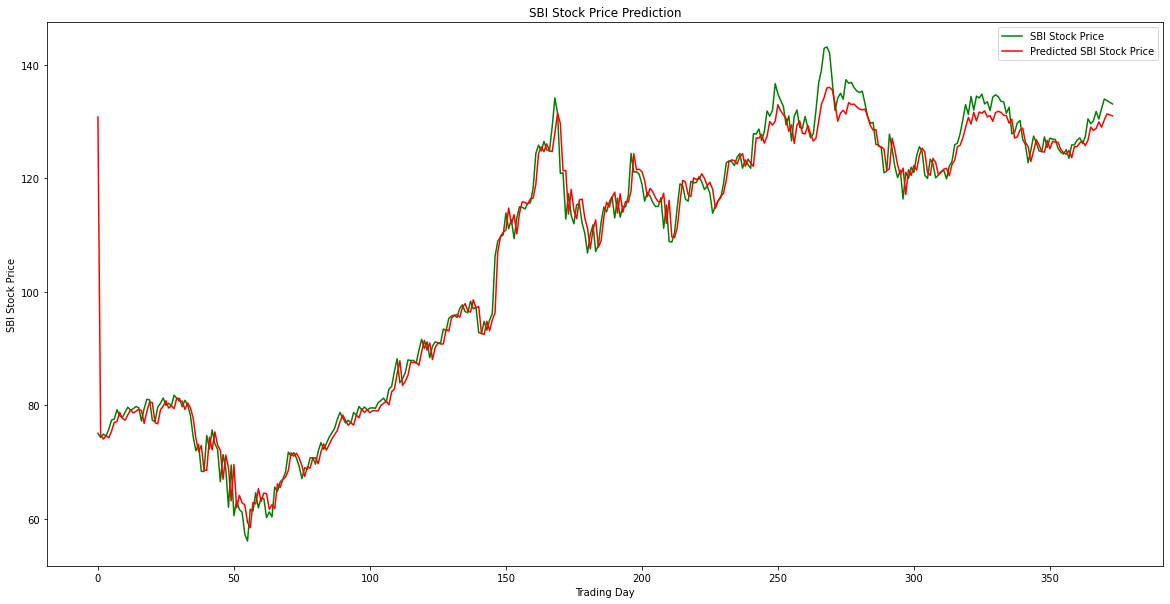

In [13]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()
